### 📈 Crypto Adoption & Migration Analysis

This notebook analyzes the relationship between **cryptocurrency adoption trends** and **international migrant stock distribution** across countries.

### 📦 Install Required Libraries

This section ensures that all necessary Python libraries are installed before proceeding with the analysis.

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import pearsonr

In [4]:
# Define file paths
gcai_path = "../1_datasets/cleaned/GCAI.xlsx"
migrant_path = "../1_datasets/cleaned/Migrant_Stock.xlsx"

# Load Excel files
GCAI_df = pd.read_excel(gcai_path)
migrant_stock_df = pd.read_excel(migrant_path)

# Preview the data
print(GCAI_df)
print(migrant_stock_df)

     Rank        Country  Year                               Region
0       1        Vietnam  2022  Central & Southern Asia and Oceania
1       2    Philippines  2022  Central & Southern Asia and Oceania
2       3        Ukraine  2022                       Eastern Europe
3       4          India  2022  Central & Southern Asia and Oceania
4       5  United States  2022                        North America
..    ...            ...   ...                                  ...
439   147      Mauritius  2024                   Sub-Saharan Africa
440   148         Belize  2024                        Latin America
441   149  Rep. of Congo  2024                   Sub-Saharan Africa
442   150           Mali  2024                   Sub-Saharan Africa
443   151       Botswana  2024                   Sub-Saharan Africa

[444 rows x 4 columns]
                              Region  2024 Migrant Stock
0                 Sub-Saharan Africa            24306400
1                     Eastern Africa          

## Match and group regions in migarnts_stock to match GCAI

In [5]:
# Explore unique regions in GCAI_df
print(" GCAI_df Regions:")
print(GCAI_df["Region"].dropna().unique())

# Explore unique regions in migrant_stock_df
print("\n Migrant Stock Regions:")
print(migrant_stock_df["Region"].dropna().unique())

 GCAI_df Regions:
['Central & Southern Asia and Oceania' 'Eastern Europe' 'North America'
 'Latin America' 'Eastern Asia' 'Sub-Saharan Africa'
 'Middle East & North Africa' 'Central Northern & Western Europe']

 Migrant Stock Regions:
['  Sub-Saharan Africa' '  Eastern Africa' '  Middle Africa'
 '  Northern Africa' '  Central Asia' '  Eastern Asia' '  Southern Asia'
 '  Eastern Europe' '  Northern Europe' '  Southern Europe'
 '  Western Europe' ' LATIN AMERICA AND THE CARIBBEAN' ' NORTHERN AMERICA'
 ' OCEANIA ']


In [9]:
migrant_stock_df["Region"] = migrant_stock_df["Region"].str.strip()

# Mapping subregions → GCAI regions
group_map = {
    "Sub-Saharan Africa": "Sub-Saharan Africa",
    "Eastern Africa": "Middle East & North Africa",
    "Middle Africa": "Middle East & North Africa",
    "Northern Africa": "Middle East & North Africa",
    "Central Asia": "Central & Southern Asia and Oceania",
    "Southern Asia": "Central & Southern Asia and Oceania",
    "Oceania": "Central & Southern Asia and Oceania",
    "Eastern Asia": "Eastern Asia",
    "Eastern Europe": "Eastern Europe",
    "Northern Europe": "Central Northern & Western Europe",
    "Southern Europe": "Central Northern & Western Europe",
    "Western Europe": "Central Northern & Western Europe",
    "LATIN AMERICA AND THE CARIBBEAN": "Latin America",
    "NORTHERN AMERICA": "North America",
}
# Apply the mapping to create a new column
migrant_stock_df["Region"] = migrant_stock_df["Region"].map(group_map)
# Group by GCAI_Region and sum the migrant stock for 2024
migrant_stock_grouped = (
    migrant_stock_df.groupby("Region")["2024 Migrant Stock"].sum().reset_index()
)
migrant_stock_grouped

,Region,2024 Migrant Stock
0,Central & Southern Asia and Oceania,20369652
1,Central Northern & Western Europe,75405410
2,Eastern Asia,11559387
3,Eastern Europe,18646093
4,Latin America,17510527
5,Middle East & North Africa,18031767
6,North America,61207877
7,Sub-Saharan Africa,24306400


### Crypto Adoption Score by Region (2022–2024)

The chart shows the average standardized crypto adoption score per region.  
Each score is normalized between 0 and 1, where:

- **1.0** = Best (Rank 1, highest adoption)
- **0.0** = Worst (Rank 151, lowest adoption)

This helps compare regions intuitively and consistently across years.

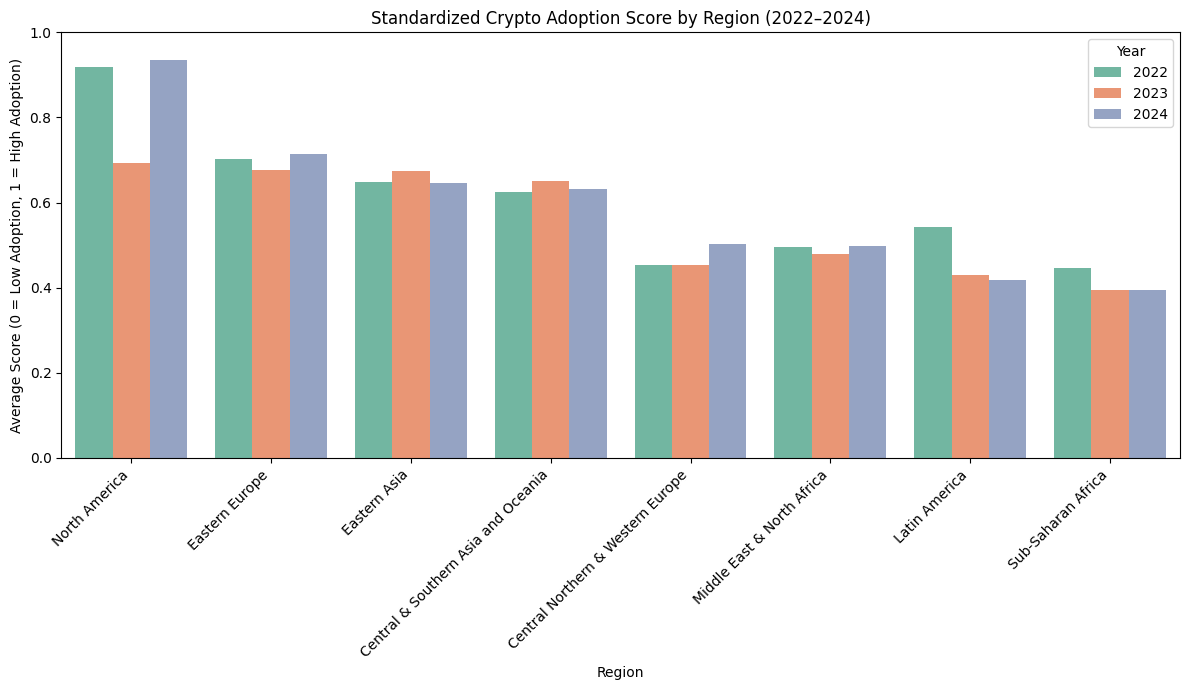

In [10]:
# Determine min and max rank
min_rank = GCAI_df["Rank"].min()  # Should be 1
max_rank = GCAI_df["Rank"].max()  # Should be 151

# Standardized adoption score: higher = better
GCAI_df["Adoption Score"] = (max_rank - GCAI_df["Rank"]) / (max_rank - min_rank)

region_year_score = (
    GCAI_df.groupby(["Year", "Region"])["Adoption Score"].mean().reset_index()
)

# Order regions by 2024 adoption score
region_order = (
    region_year_score[region_year_score["Year"] == 2024]
    .sort_values("Adoption Score", ascending=False)["Region"]
    .tolist()
)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=region_year_score,
    x="Region",
    y="Adoption Score",
    hue="Year",
    order=region_order,
    palette="Set2",
)

plt.title("Standardized Crypto Adoption Score by Region (2022–2024)")
plt.ylabel("Average Score (0 = Low Adoption, 1 = High Adoption)")
plt.xlabel("Region")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

c:\Users\fdool\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\fdool\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\fdool\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


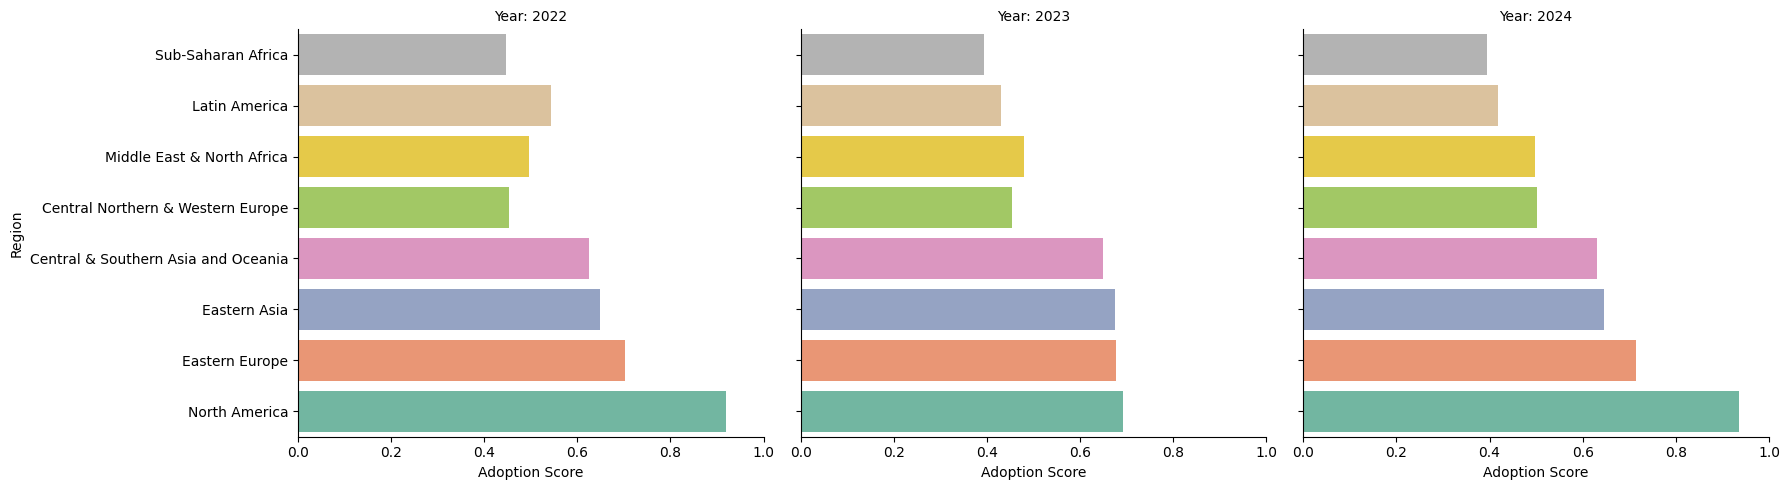

In [11]:
# Set up the FacetGrid
g = sns.FacetGrid(
    region_year_score,
    col="Year",
    col_order=[2022, 2023, 2024],
    height=5,
    aspect=1.2,
    sharey=True,
)

# Map barplots to each subplot
g.map_dataframe(
    sns.barplot, x="Adoption Score", y="Region", order=region_order, palette="Set2"
)

# Tweak plot titles and layout
g.set_titles("Year: {col_name}")
g.set_axis_labels("Adoption Score", "Region")
for ax in g.axes.flat:
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
g.tight_layout()
plt.show()

### Migrant Stock Distribution by Region (2024)

The pie chart shows the relative share of each region in hosting the global international migrant stock as of 2024.  
This visualization helps identify regions with high migrant concentrations, which may benefit most from decentralized financial and identity solutions like blockchain-based systems.

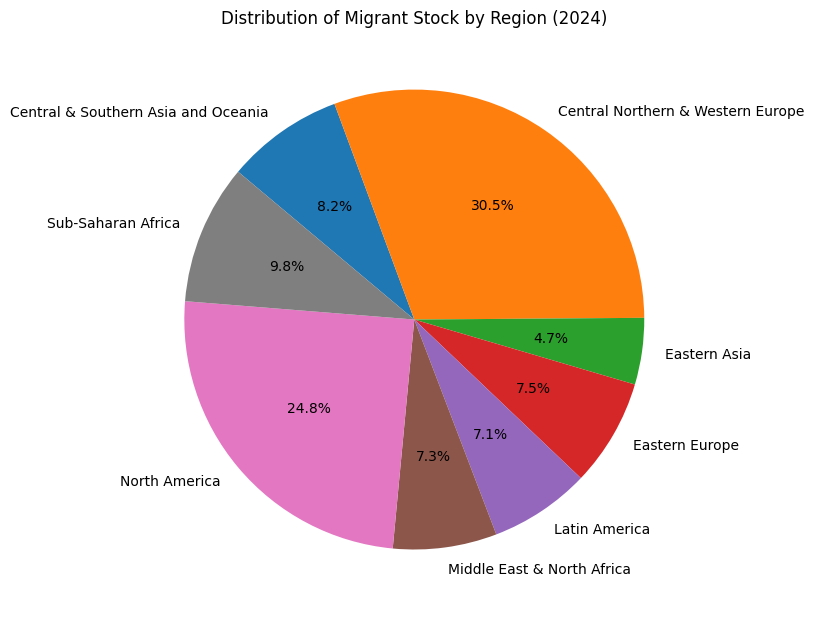

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(
    migrant_stock_grouped["2024 Migrant Stock"],
    labels=migrant_stock_grouped["Region"],
    autopct="%1.1f%%",
    startangle=140,
    counterclock=False,
)
plt.title("Distribution of Migrant Stock by Region (2024)")
plt.tight_layout()
plt.show()

### Correlation Analysis: Migrant Stock vs. Crypto Adoption

To explore the relationship between migrant populations and crypto adoption, we merged two datasets:

- **Crypto Adoption Scores:** Standardized scores (0–1) derived from global crypto adoption ranks for 2022, 2023, and 2024.
- **Migrant Stock Values:** Taken from the `migrant_stock_grouped` DataFrame, representing the number of international migrants per region in 2024.

By merging these on the shared `Region` column, we created a dataset that allows year-by-year correlation analysis.

#### Why This Matters:
Understanding the correlation between migrant stock and crypto adoption can shed light on whether regions with larger mobile or financially excluded populations are more likely to adopt cryptocurrency-based systems as an alternative to traditional finance.

- **Adoption Score:** Higher = greater crypto adoption (rank closer to 1).
- **Migrant Stock:** Total international migrant population by region (2024).

The merged dataset enables both visual and statistical exploration of this relationship.


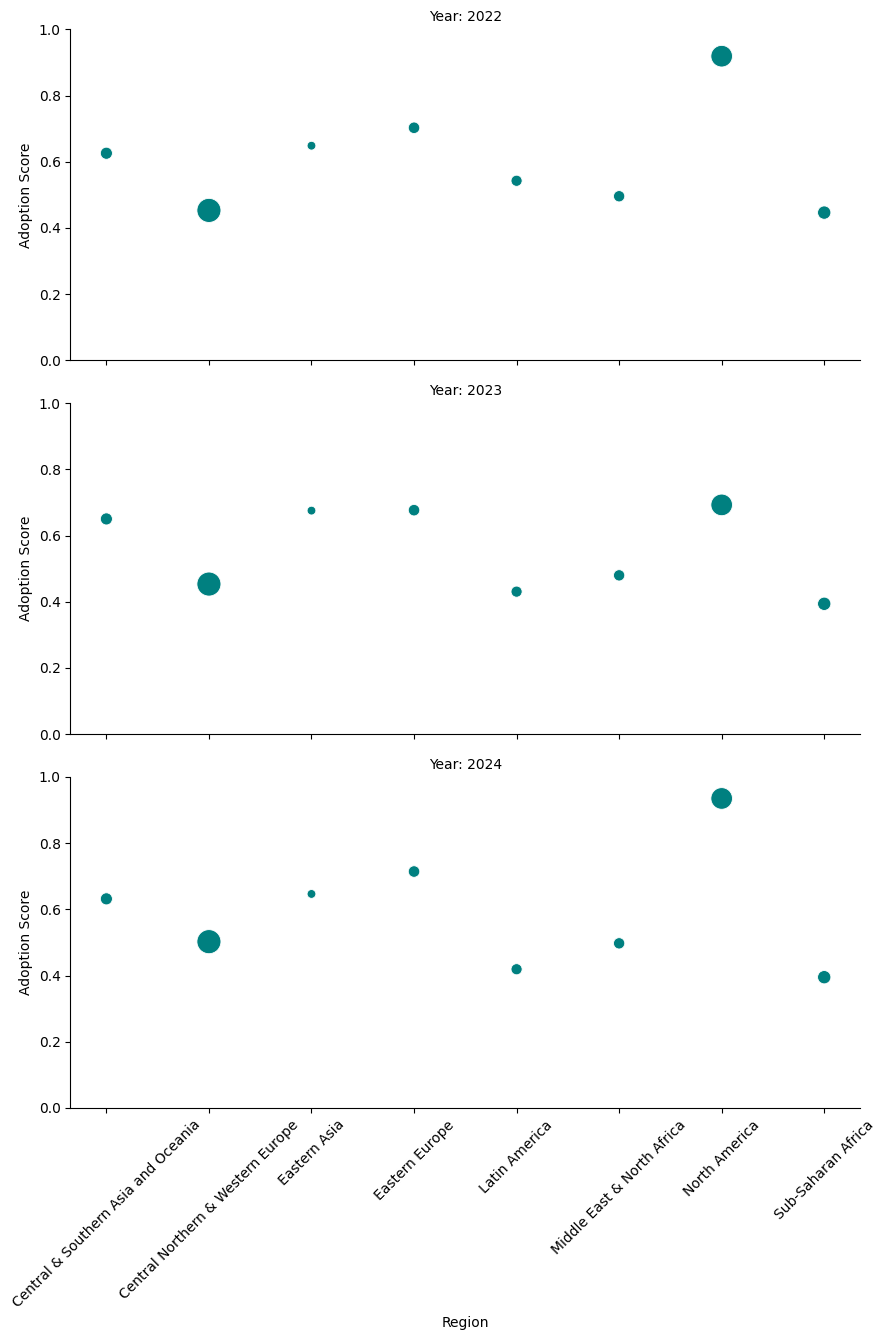

In [13]:
# Group crypto adoption scores by region and year
adoption_summary = (
    GCAI_df.groupby(["Year", "Region"])["Adoption Score"].mean().reset_index()
)

# Ensure region names match (strip whitespace if needed)
migrant_stock_grouped["Region"] = migrant_stock_grouped["Region"].str.strip()

# Rename migrant column for clarity
migrant_stock_grouped = migrant_stock_grouped.rename(
    columns={"2024 Migrant Stock": "Migrant Stock"}
)

# Merge adoption scores with migrant stock by Region
merged = adoption_summary.merge(migrant_stock_grouped, on="Region", how="inner")

# Prepare log-scaled migrant stock (for better distribution)
merged["Migrant Stock (Millions)"] = merged["Migrant Stock"] / 1_000_000
# Create vertical facet grid (1 column, multiple rows for each year)
g = sns.FacetGrid(
    merged,
    row="Year",
    height=4.5,
    aspect=2,
    row_order=[2022, 2023, 2024],
    sharex=True,
    sharey=True,
)

# Plot scatter plots per year
g.map_dataframe(
    sns.scatterplot,
    x="Region",
    y="Adoption Score",
    size="Migrant Stock (Millions)",
    sizes=(40, 300),
    legend=False,
    color="teal",
)

# Rotate region names
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylim(0, 1)

# Set axis labels and titles
g.set_axis_labels("Region", "Adoption Score")
g.set_titles("Year: {row_name}")
g.tight_layout()
plt.show()

C:\Users\fdool\AppData\Local\Temp\ipykernel_32596\3576557187.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_2024["Region"], rotation=45, ha="right")


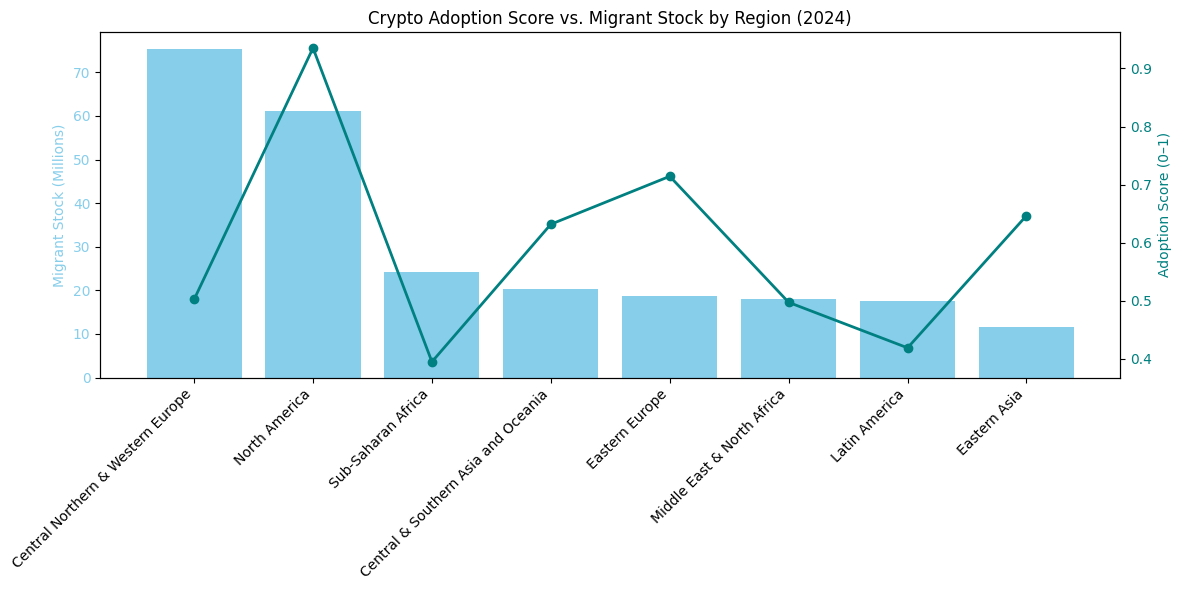

In [14]:
# Filter for 2024
merged_2024 = merged[merged["Year"] == 2024].copy()

# Sort by migrant stock for cleaner plotting
merged_2024 = merged_2024.sort_values("Migrant Stock", ascending=False)

# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot migrant stock (left y-axis)
ax1.bar(
    merged_2024["Region"],
    merged_2024["Migrant Stock (Millions)"],
    color="skyblue",
    label="Migrant Stock (Millions)",
)
ax1.set_ylabel("Migrant Stock (Millions)", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_xticklabels(merged_2024["Region"], rotation=45, ha="right")

# Create second y-axis for adoption score
ax2 = ax1.twinx()
ax2.plot(
    merged_2024["Region"],
    merged_2024["Adoption Score"],
    color="teal",
    marker="o",
    linewidth=2,
    label="Adoption Score",
)
ax2.set_ylabel("Adoption Score (0–1)", color="teal")
ax2.tick_params(axis="y", labelcolor="teal")

# Title & layout
plt.title("Crypto Adoption Score vs. Migrant Stock by Region (2024)")
fig.tight_layout()
plt.show()

### 📊 Distribution of Crypto Adoption Scores by Region (2024)

This plot visualizes the distribution of crypto adoption scores across all countries in 2024, grouped by region. Each point represents a country, plotted based on its adoption score.

- The **x-axis** represents different regions.
- The **y-axis** indicates the crypto adoption score (standardized between 0 and 1).
- **Each dot** corresponds to a country within its region.
- **Vertical spread** shows how adoption levels vary between countries in the same region.
- **Dense clusters** indicate consistent regional performance, while wider spreads show regional disparities in adoption.

This helps identify which regions have strong internal consistency in crypto adoption and which exhibit greater variation among member countries.

C:\Users\fdool\AppData\Local\Temp\ipykernel_32596\3382856706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


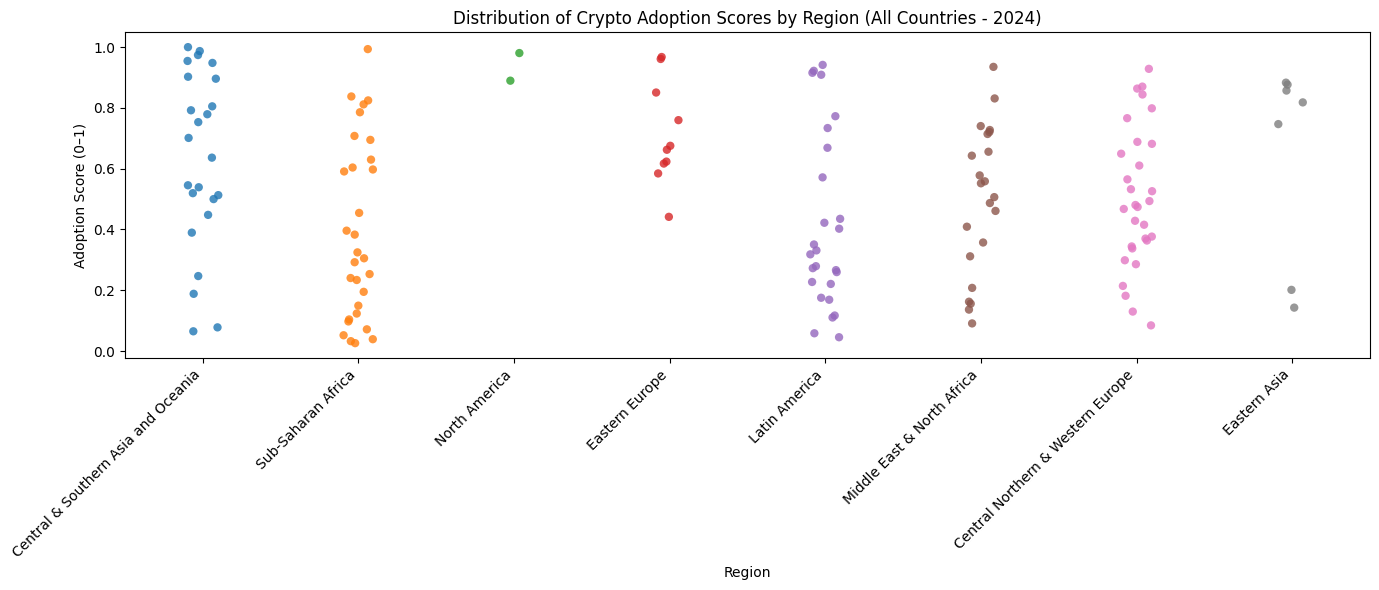

In [15]:
# Filter all countries for 2024
all_2024 = GCAI_df[GCAI_df["Year"] == 2024].copy()

# Plot
plt.figure(figsize=(14, 6))
sns.stripplot(
    data=all_2024,
    x="Region",
    y="Adoption Score",
    jitter=True,
    size=6,
    alpha=0.8,
    palette="tab10",
)

# Enhance plot
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Crypto Adoption Scores by Region (All Countries - 2024)")
plt.xlabel("Region")
plt.ylabel("Adoption Score (0–1)")
plt.tight_layout()
plt.show()

In [16]:
GCAI_df[(GCAI_df["Year"] == 2024) & (GCAI_df["Region"] == "North America")]

,Rank,Country,Year,Region,Adoption Score
296,4,United States,2024,North America,0.980519
310,18,Canada,2024,North America,0.889610


### 📊 Regional Analysis of Crypto Adoption and Migrant Stock (Top 50 Countries, 2024, Score > 0.5)

This visualization compares the average crypto adoption scores and migrant stock levels across regions using filtered data from the top 50 countries in 2024.

**Criteria applied:**
- ✅ Only countries ranked in the **top 50 globally** for 2024.
- ✅ Only countries with a **crypto adoption score greater than 0.5** are included.
- ✅ **All regions**, including **North America**, are considered.

**Plot description:**
- The **bar chart** represents the **average migrant stock** (in millions) per region.
- The **line chart** represents the **average crypto adoption score** (normalized between 0 and 1) for each region.
- This dual-axis comparison reveals how regions with large migrant populations align with levels of crypto adoption among leading countries.

This analysis supports identifying whether high levels of migration correspond with increased interest in decentralized financial solutions like cryptocurrency.

C:\Users\fdool\AppData\Local\Temp\ipykernel_32596\1836303085.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped_filtered["Region"], rotation=45, ha="right")


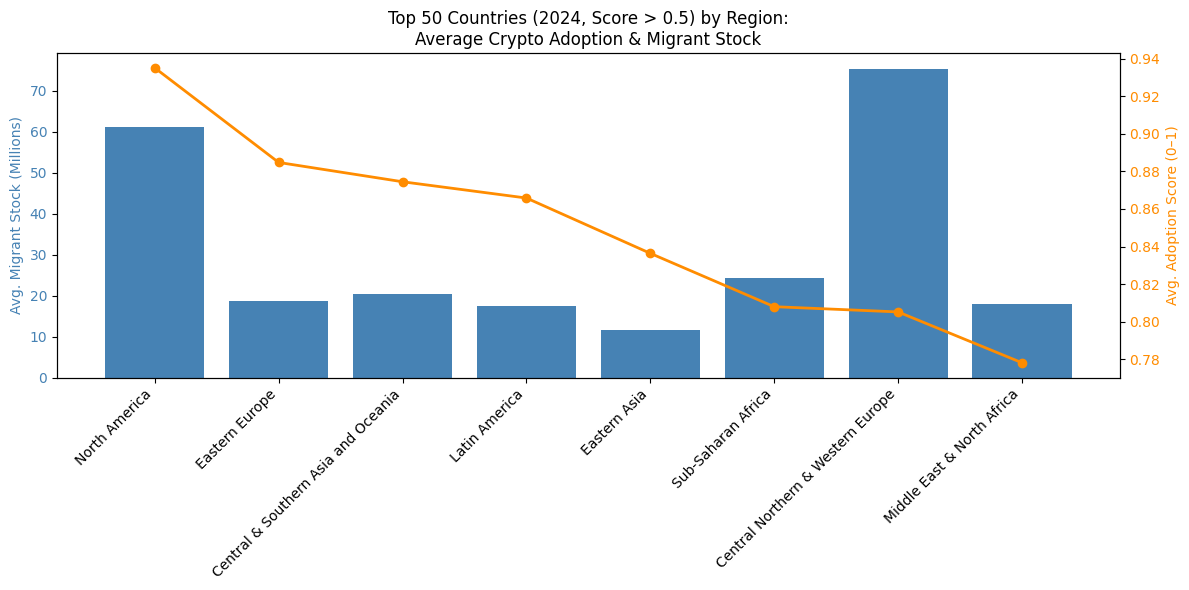

In [17]:
# Step 1: Filter top 50 countries from 2024
top_50_2024 = GCAI_df[GCAI_df["Year"] == 2024].nsmallest(50, "Rank").copy()

# Step 2: Keep only countries with adoption score > 0.5
filtered_top_50 = top_50_2024[top_50_2024["Adoption Score"] > 0.5].copy()

# Step 3: Merge with migrant stock by region
filtered_top_50 = filtered_top_50.merge(
    migrant_stock_grouped.rename(columns={"2024 Migrant Stock": "Migrant Stock"}),
    on="Region",
    how="left",
)

# Step 4: Normalize migrant stock
filtered_top_50["Migrant Stock (Millions)"] = (
    filtered_top_50["Migrant Stock"] / 1_000_000
)

# Step 5: Group by Region
grouped_filtered = (
    filtered_top_50.groupby("Region")
    .agg(
        {
            "Adoption Score": "mean",
            "Migrant Stock (Millions)": "mean",  # Use "sum" if preferred
            "Country": "count",
        }
    )
    .reset_index()
    .rename(columns={"Country": "Number of Countries"})
)

# Step 6: Sort for better visuals
grouped_filtered = grouped_filtered.sort_values("Adoption Score", ascending=False)

# Step 7: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for migrant stock
ax1.bar(
    grouped_filtered["Region"],
    grouped_filtered["Migrant Stock (Millions)"],
    color="steelblue",
    label="Avg. Migrant Stock (Millions)",
)
ax1.set_ylabel("Avg. Migrant Stock (Millions)", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.set_xticklabels(grouped_filtered["Region"], rotation=45, ha="right")

# Line plot for adoption score
ax2 = ax1.twinx()
ax2.plot(
    grouped_filtered["Region"],
    grouped_filtered["Adoption Score"],
    color="darkorange",
    marker="o",
    linewidth=2,
    label="Avg. Adoption Score",
)
ax2.set_ylabel("Avg. Adoption Score (0–1)", color="darkorange")
ax2.tick_params(axis="y", labelcolor="darkorange")

# Title
plt.title(
    "Top 50 Countries (2024, Score > 0.5) by Region:\nAverage Crypto Adoption & Migrant Stock"
)
plt.tight_layout()
plt.show()

### 🔗 Correlation Analysis: Crypto Adoption vs. Migrant Stock

This analysis computes the **Pearson correlation coefficient** to evaluate the linear relationship between:

- Average **crypto adoption scores** and  
- Average **migrant stock (in millions)**

across regions, based on the top 50 ranked countries in 2024 (score > 0.5).

A **positive correlation** would suggest that regions with higher migrant populations tend to have higher crypto adoption, possibly due to greater demand for alternative financial tools. A **negative or weak correlation** suggests less direct influence.

The output also includes a **p-value** to assess the statistical significance of the correlation.


In [18]:
# Compute Pearson correlation between adoption and migrant stock
correlation, p_value = pearsonr(
    grouped_filtered["Adoption Score"], grouped_filtered["Migrant Stock (Millions)"]
)

# Print result
print(f"📈 Pearson correlation: {correlation:.3f}")
print(f"📊 p-value: {p_value:.3f}")

# Interpretation guide (optional)
if abs(correlation) > 0.7:
    interpretation = "Strong correlation"
elif abs(correlation) > 0.4:
    interpretation = "Moderate correlation"
else:
    interpretation = "Weak or no correlation"

print(f"🔍 Interpretation: {interpretation}")

📈 Pearson correlation: 0.136
📊 p-value: 0.748
🔍 Interpretation: Weak or no correlation


### 🔗 Correlation Analysis (Excluding Central Northern & Western Europe)

This correlation analysis investigates the relationship between:

- **Average Crypto Adoption Score**
- **Average Migrant Stock (Millions)**

across regions, **excluding Central Northern & Western Europe** to reduce bias caused by its relatively high migrant population and distinct adoption patterns.

By removing this region, we assess whether the general relationship between migration levels and crypto adoption remains consistent and significant among the remaining regions.

In [19]:
# Exclude "Central Northern & Western Europe" before correlation
filtered_group = grouped_filtered[
    grouped_filtered["Region"] != "Central Northern & Western Europe"
]

# Compute Pearson correlation
correlation, p_value = pearsonr(
    filtered_group["Adoption Score"], filtered_group["Migrant Stock (Millions)"]
)

# Print results
print(f"📈 Pearson correlation (excluding CNWE): {correlation:.3f}")
print(f"📊 p-value: {p_value:.3f}")

# Interpretation
if abs(correlation) > 0.7:
    interpretation = "Strong correlation"
elif abs(correlation) > 0.4:
    interpretation = "Moderate correlation"
else:
    interpretation = "Weak or no correlation"

print(f"🔍 Interpretation: {interpretation}")

📈 Pearson correlation (excluding CNWE): 0.647
📊 p-value: 0.116
🔍 Interpretation: Moderate correlation
